# Lab 10 : Model Selction

In [4]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

The **Dataset.csv** data set includes details of 1000 readings of temperature,  humidity and light intensity which we have collected from different sensors. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Humidity    | Humidity value from DHT Sensor                                            |
| Light      | Presence of light using LDR Sensor                                                    |
| Temperature          | Temperature Value using DHT Sensor |

## Import Training Dataset

In [5]:
df = pd.read_csv('Dataset.csv')
df.head()

,Humidity,Light,Temperature
0,44.560,3.0,17.145
1,42.550,0.0,18.085
2,43.155,5.0,17.675
3,42.840,4.0,18.170
4,44.090,5.0,17.450


## EDA Steps

In [6]:
df.shape

(1000, 3)

In [7]:
df.columns

Index(['Humidity', 'Light', 'Temperature'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Humidity     1000 non-null   float64
 1   Light        1000 non-null   float64
 2   Temperature  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [9]:
df.describe()

,Humidity,Light,Temperature
count,1000.000000,1000.000000,1000.000000
mean,45.457185,776.472710,18.465125
std,6.340446,441.705392,3.719404
min,13.000000,0.000000,15.145000
25%,42.622500,414.310000,17.023750
50%,45.360000,793.175000,17.485000
75%,50.010000,1147.950000,18.627500
max,60.060000,1916.420000,42.500000


# Data visualization and pre-processing Steps

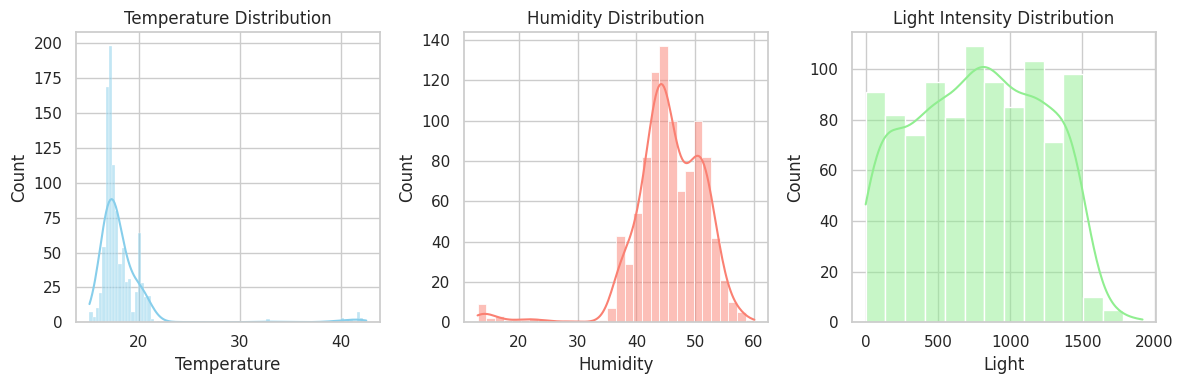

<Figure size 1000x600 with 0 Axes>

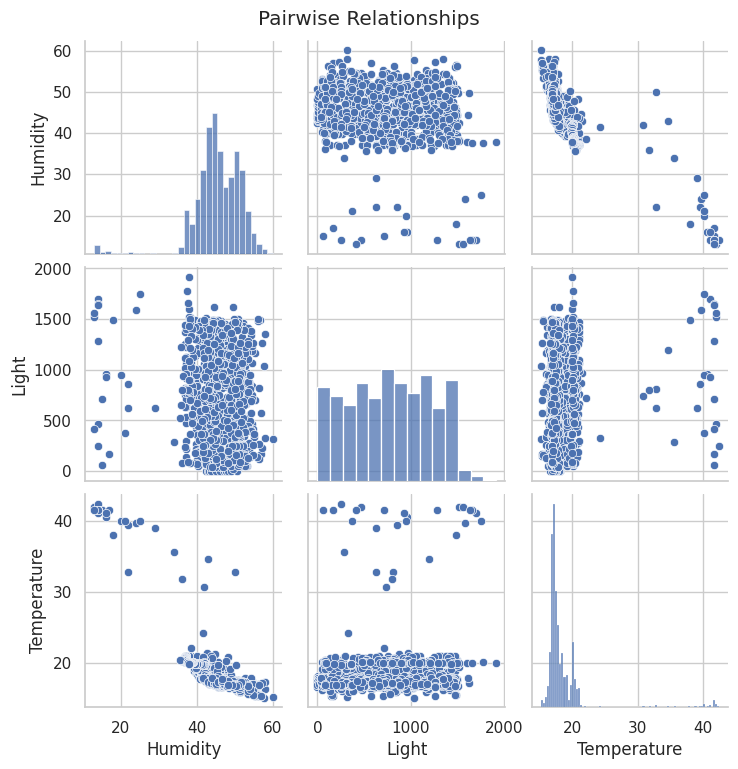

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plots
sns.set(style="whitegrid")

# Visualize the distribution of temperature, humidity, and light intensity
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.histplot(df['Temperature'], kde=True, color='skyblue')
plt.title('Temperature Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Humidity'], kde=True, color='salmon')
plt.title('Humidity Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Light'], kde=True, color='lightgreen')
plt.title('Light Intensity Distribution')

plt.tight_layout()
plt.show()

# Visualize the relationships between temperature, humidity, and light intensity
plt.figure(figsize=(10, 6))
sns.pairplot(df)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


### Split the Data into Training and Testing Set

## Normalize Data

Data Standardization give data zero mean and unit variance
StandardScaler is used for normalization in regression tasks (and other machine learning tasks) to ensure that all features are on a similar scale. This is important for Effect of Scale and Distance based algorithm such as SVM which can be influenced by scale of feature

# Regression

We are using the following algorithm:

*   Logistic Regression
*   Random Forest
*   Gradient Boosting
*   Support Vector Machine


### Parameter Tunning using Grid Search Cv

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'Dataset.csv')

# Split the data into features (X) and target variable (y)
X = df[['Humidity', 'Light']]  # Input features: Humidity and Light
y = df['Temperature']  # Target variable: Temperature

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models to be trained
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

# Define the hyperparameter grids for each model
param_grids = {
    'Linear Regression': {},  # No hyperparameters to tune for Linear Regression
    'Random Forest': {'n_estimators': [50, 100, 200],
                      'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200],
                          'learning_rate': [0.01, 0.1, 0.2]},
    'Support Vector Regression': {'kernel': ['linear', 'rbf'],
                                  'C': [0.1, 1, 10]}
}

# Perform grid search for each model
best_estimators = {}
for model_name, model in models.items():
    print(f"Performing grid search for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best R^2 score for {model_name}: {grid_search.best_score_}")
    print("")

# Display the best estimators
print("Best estimators:")
for model_name, best_estimator in best_estimators.items():
    print(f"{model_name}: {best_estimator}")


Performing grid search for Linear Regression...
Best parameters for Linear Regression: {}
Best R^2 score for Linear Regression: 0.5932649176463691

Performing grid search for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}
Best R^2 score for Random Forest: 0.8114381319849807

Performing grid search for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'n_estimators': 50}
Best R^2 score for Gradient Boosting: 0.8296927748855392

Performing grid search for Support Vector Regression...
Best parameters for Support Vector Regression: {'C': 10, 'kernel': 'rbf'}
Best R^2 score for Support Vector Regression: 0.8097669232621929

Best estimators:
Linear Regression: LinearRegression()
Random Forest: RandomForestRegressor(max_depth=10)
Gradient Boosting: GradientBoostingRegressor(n_estimators=50)
Support Vector Regression: SVR(C=10)


***In regression tasks, we typically don't use the term "accuracy" as we do in classification tasks because accuracy refers to the proportion of correctly classified instances in a classification problem.***

For regression tasks, we primarily use metrics like R^2 score, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to evaluate the model's performance. However, we can assess the model's fit to the training data and its generalization to the testing data by calculating the R^2 score on both the training and testing sets.

###Let's calculate the R^2 score for both the training and testing sets for each model:

In [14]:
# Initialize dictionaries to store training and testing R^2 scores for each model
training_r2_scores = {}
testing_r2_scores = {}

# Calculate R^2 scores for training and testing sets for each model
for model_name, best_estimator in best_estimators.items():
    # Training set R^2 score
    training_r2 = best_estimator.score(X_train_scaled, y_train)
    training_r2_scores[model_name] = training_r2

    # Testing set R^2 score
    testing_r2 = best_estimator.score(X_test_scaled, y_test)
    testing_r2_scores[model_name] = testing_r2

# Print the results
print("Training R^2 scores:")
for model_name, r2 in training_r2_scores.items():
    print(f"{model_name}: {r2}")

print("\nTesting R^2 scores:")
for model_name, r2 in testing_r2_scores.items():
    print(f"{model_name}: {r2}")


Training R^2 scores:
Linear Regression: 0.6221114590432464
Random Forest: 0.9674838675765469
Gradient Boosting: 0.9405166102787277
Support Vector Regression: 0.8685980320381649

Testing R^2 scores:
Linear Regression: 0.7115797111153599
Random Forest: 0.9137940950350083
Gradient Boosting: 0.9130888189027822
Support Vector Regression: 0.9069362235523547


# Model Evaluation

In [15]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, rmse

# Evaluate each model on the testing set
evaluations = {}
for model_name, model in best_estimators.items():
    r2, mse, rmse = evaluate_model(model, X_test_scaled, y_test)
    evaluations[model_name] = {'R^2 Score': r2, 'MSE': mse, 'RMSE': rmse}

# Create a table to compare model performance
evaluation_table = pd.DataFrame.from_dict(evaluations, orient='index')
print("Model Evaluation Table:")
print(evaluation_table)


Model Evaluation Table:
                           R^2 Score       MSE      RMSE
Linear Regression           0.711580  6.796245  2.606961
Random Forest               0.913794  2.031329  1.425247
Gradient Boosting           0.913089  2.047948  1.431065
Support Vector Regression   0.906936  2.192926  1.480853


# using K-fold cross validation

Linear Regression: Mean R^2 Score: 0.48511597683757274, Standard Deviation: 0.26654192086133255
Random Forest: Mean R^2 Score: 0.723127038443418, Standard Deviation: 0.2480026377529217
Gradient Boosting: Mean R^2 Score: 0.7817543908964861, Standard Deviation: 0.18479111487597016
Support Vector Regression: Mean R^2 Score: 0.7720997853606735, Standard Deviation: 0.16917886130659193


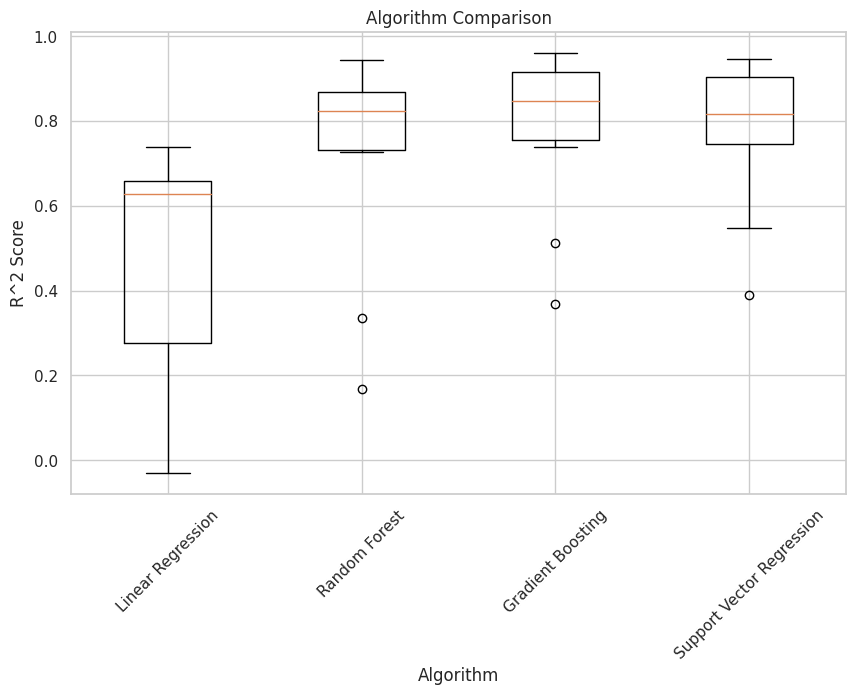

In [16]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Define the models to be compared
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(max_depth=10)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=50)),
    ('Support Vector Regression', SVR(C=10))
]

# Perform k-fold cross-validation and compare the algorithms
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: Mean R^2 Score: {cv_results.mean()}, Standard Deviation: {cv_results.std()}")

# Create a boxplot to compare the algorithms
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


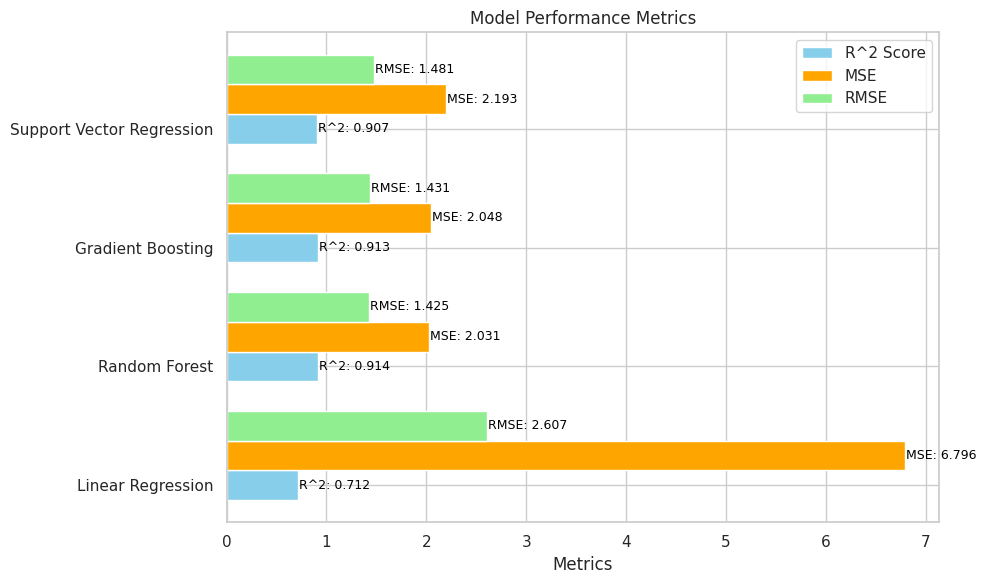

In [23]:
import matplotlib.pyplot as plt

# Extract metrics from evaluation table
r2_scores = evaluation_table['R^2 Score']
mses = evaluation_table['MSE']
rmses = evaluation_table['RMSE']

# Define the width of each bar
bar_width = 0.25

# Define the positions for the bars
positions_r2 = range(len(evaluation_table))
positions_mse = [pos + bar_width for pos in positions_r2]
positions_rmse = [pos + 2 * bar_width for pos in positions_r2]

# Plotting R^2 score, MSE, and RMSE
plt.figure(figsize=(10, 6))
plt.barh(positions_r2, r2_scores, height=bar_width, color='skyblue', label='R^2 Score')
plt.barh(positions_mse, mses, height=bar_width, color='orange', label='MSE')
plt.barh(positions_rmse, rmses, height=bar_width, color='lightgreen', label='RMSE')

# Display R^2 score, MSE, and RMSE values on each bar
for i in range(len(evaluation_table)):
    plt.text(r2_scores[i] + 0.01, positions_r2[i], f'R^2: {r2_scores[i]:.3f}', va='center', color='black', fontsize=9)
    plt.text(mses[i] + 0.01, positions_mse[i], f'MSE: {mses[i]:.3f}', va='center', color='black', fontsize=9)
    plt.text(rmses[i] + 0.01, positions_rmse[i], f'RMSE: {rmses[i]:.3f}', va='center', color='black', fontsize=9)

# Set y-axis labels
plt.yticks(range(len(evaluation_table)), evaluation_table.index)

plt.xlabel('Metrics')
plt.title('Model Performance Metrics')
plt.legend()
plt.tight_layout()
plt.show()
